In [28]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Initialize dictionaries to store data for each file type across all years
fhh_dfs = {}
f_dfs = {}
z_dfs = {}
y_dfs = {}

# Loop through each year, load the data, and store in the corresponding dictionary
for year in years:
    fhh_dfs[year] = pd.read_csv(f'WIODv2016_data/fhh_{year}.csv')
    f_dfs[year] = pd.read_csv(f'WIODv2016_data/f_{year}.csv')
    z_dfs[year] = pd.read_csv(f'WIODv2016_data/z_{year}.csv')
    y_dfs[year] = pd.read_csv(f'WIODv2016_data/y_{year}.csv')

# Display the first few rows and the structure of each dataframe for a specific year, e.g., 2000
(fhh_dfs[2000].head(), fhh_dfs[2000].columns), (f_dfs[2000].head(), f_dfs[2000].columns), (z_dfs[2000].head(), z_dfs[2000].columns), (y_dfs[2000].head(), y_dfs[2000].columns)


((  Unnamed: 0        0
  0        AUT  14569.0
  1        AUS  30697.2
  2        BEL  29949.0
  3        BGR   3225.1
  4        BRA  42616.0,
  Index(['Unnamed: 0', '0'], dtype='object')),
 (                                          Unnamed: 0       0
  0  AUT Crop and animal production, hunting and re...  1598.2
  1                           AUT Forestry and logging     0.0
  2                        AUT Fishing and aquaculture     0.0
  3                           AUT Mining and quarrying   842.4
  4  AUT Manufacture of food products, beverages an...  1131.2,
  Index(['Unnamed: 0', '0'], dtype='object')),
 (                                          Unnamed: 0  \
  0  AUT Crop and animal production, hunting and re...   
  1                           AUT Forestry and logging   
  2                        AUT Fishing and aquaculture   
  3                           AUT Mining and quarrying   
  4  AUT Manufacture of food products, beverages an...   
  
     AUT Crop and animal produc

In [29]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Function to extract rows related to Austria (AUT) and limit to specified number of columns
def filter_and_limit_cols(df, column_name, num_cols):
    filtered_df = df[df[column_name].str.contains("AUT")]
    return filtered_df.iloc[:, :num_cols]

# Loop through each year, apply the function, and save the filtered data to new CSV files
for year in years:
    fhh_df = pd.read_csv(f'WIODv2016_data/fhh_{year}.csv')
    f_df = pd.read_csv(f'WIODv2016_data/f_{year}.csv')
    z_df = pd.read_csv(f'WIODv2016_data/z_{year}.csv')
    y_df = pd.read_csv(f'WIODv2016_data/y_{year}.csv')

    fhh_aut = filter_and_limit_cols(fhh_df, 'Unnamed: 0', 2)
    f_aut = filter_and_limit_cols(f_df, 'Unnamed: 0', 2)
    z_aut = filter_and_limit_cols(z_df, 'Unnamed: 0', 57)
    y_aut = filter_and_limit_cols(y_df, 'Unnamed: 0', 2)

    fhh_aut.to_csv(f'fhh_{year}_aut.csv', index=False)
    f_aut.to_csv(f'f_{year}_aut.csv', index=False)
    z_aut.to_csv(f'z_{year}_aut.csv', index=False)
    y_aut.to_csv(f'y_{year}_aut.csv', index=False)


In [30]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Function to compute the technical coefficients matrix
def compute_technical_coefficients(file_path):
    # Read data
    z_df = pd.read_csv(file_path, index_col=0)
    
    # Recheck if any columns are all zeros and set sums to one where necessary to avoid division by zero
    z_sums = z_df.sum(axis=0)
    z_sums[z_sums == 0] = 1  # Prevent division by zero in sectors with zero total output

    # Compute the technical coefficients matrix A
    A_matrix = z_df / z_sums

    # Convert the numpy array back to a DataFrame for easier handling and to include sector labels
    A_df = pd.DataFrame(A_matrix, columns=z_df.columns, index=z_df.index)
    
    return A_df

# Loop through each year, compute the matrix, and save the results
for year in years:
    z_aut_file_path = f'z_{year}_aut.csv'
    A_df = compute_technical_coefficients(z_aut_file_path)
    A_df.to_csv(f'A_matrix_{year}_aut.csv')

# Outputting the path of the last A matrix computed as an example
f'A_matrix_{year}_aut.csv'


'A_matrix_2014_aut.csv'

In [31]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Load and display the A matrix for each year
for year in years:
    a_matrix_path = f'A_matrix_{year}_aut.csv'
    A_loaded_df = pd.read_csv(a_matrix_path, index_col=0)
    
    # Display the first few rows of the matrix to check its structure for each year
    print(f"Head of A matrix for {year}:")
    print(A_loaded_df.head())


Head of A matrix for 2000:
                                                    AUT Crop and animal production, hunting and related service activities  \
Unnamed: 0                                                                                                                   
AUT Crop and animal production, hunting and rel...                                           0.398603                        
AUT Forestry and logging                                                                     0.005297                        
AUT Fishing and aquaculture                                                                  0.000739                        
AUT Mining and quarrying                                                                     0.000963                        
AUT Manufacture of food products, beverages and...                                           0.055652                        

                                                    AUT Forestry and logging  \
Unnamed: 0

Head of A matrix for 2007:
                                                    AUT Crop and animal production, hunting and related service activities  \
Unnamed: 0                                                                                                                   
AUT Crop and animal production, hunting and rel...                                           0.360805                        
AUT Forestry and logging                                                                     0.004017                        
AUT Fishing and aquaculture                                                                  0.000655                        
AUT Mining and quarrying                                                                     0.002660                        
AUT Manufacture of food products, beverages and...                                           0.056590                        

                                                    AUT Forestry and logging  \
Unnamed: 0

Head of A matrix for 2013:
                                                    AUT Crop and animal production, hunting and related service activities  \
Unnamed: 0                                                                                                                   
AUT Crop and animal production, hunting and rel...                                           0.336335                        
AUT Forestry and logging                                                                     0.002411                        
AUT Fishing and aquaculture                                                                  0.000553                        
AUT Mining and quarrying                                                                     0.006168                        
AUT Manufacture of food products, beverages and...                                           0.047751                        

                                                    AUT Forestry and logging  \
Unnamed: 0

In [32]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Loop through each year, load, process, and check the A matrix
for year in years:
    # Load the A matrix from the uploaded CSV file
    a_matrix_path = f'A_matrix_{year}_aut.csv'
    A_loaded_df = pd.read_csv(a_matrix_path, index_col=0)

    # Check and handle negative values (if any exist, set them to zero)
    A_loaded_df[A_loaded_df < 0] = 0

    # Normalize the columns such that each column sums to 1 or less
    A_loaded_df = A_loaded_df.div(A_loaded_df.sum(axis=0), axis=1)
    A_loaded_df.fillna(0, inplace=True)  # Handle any NaN resulting from division by zero

    # Identify zero rows and columns
    zero_columns = A_loaded_df.columns[(A_loaded_df.sum(axis=0) == 0)]
    zero_rows = A_loaded_df.index[(A_loaded_df.sum(axis=1) == 0)]

    # Display identified zero rows and columns (if any)
    print(f"Year {year}: Zero Columns - {list(zero_columns)}, Zero Rows - {list(zero_rows)}")


Year 2000: Zero Columns - ['AUT Repair and installation of machinery and equipment', 'AUT Architectural and engineering activities; technical testing and analysis', 'AUT Scientific research and development', 'AUT Advertising and market research', 'AUT Other professional, scientific and technical activities; veterinary activities', 'AUT Activities of extraterritorial organizations and bodies'], Zero Rows - ['AUT Repair and installation of machinery and equipment', 'AUT Architectural and engineering activities; technical testing and analysis', 'AUT Scientific research and development', 'AUT Advertising and market research', 'AUT Other professional, scientific and technical activities; veterinary activities', 'AUT Activities of extraterritorial organizations and bodies']
Year 2001: Zero Columns - ['AUT Repair and installation of machinery and equipment', 'AUT Architectural and engineering activities; technical testing and analysis', 'AUT Scientific research and development', 'AUT Advertis

In [33]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Process and save the cleaned A matrix for each year
for year in years:
    # Load the A matrix from the uploaded CSV file
    a_matrix_path = f'A_matrix_{year}_aut.csv'
    A_loaded_df = pd.read_csv(a_matrix_path, index_col=0)

    # Check and handle negative values (if any exist, set them to zero)
    A_loaded_df[A_loaded_df < 0] = 0

    # Normalize the columns such that each column sums to 1 or less
    A_loaded_df = A_loaded_df.div(A_loaded_df.sum(axis=0), axis=1)
    A_loaded_df.fillna(0, inplace=True)  # Handle any NaN resulting from division by zero

    # Identify zero rows and columns
    zero_columns = A_loaded_df.columns[(A_loaded_df.sum(axis=0) == 0)]
    zero_rows = A_loaded_df.index[(A_loaded_df.sum(axis=1) == 0)]

    # Remove the identified zero rows and columns from the matrix
    A_cleaned_df = A_loaded_df.drop(columns=zero_columns, index=zero_rows)

    # Save the cleaned A matrix to a new CSV file
    cleaned_a_matrix_filepath = f'Cleaned_A_matrix_{year}_aut.csv'
    A_cleaned_df.to_csv(cleaned_a_matrix_filepath)

    # Print the path of the saved file for confirmation
    print(f"Cleaned A matrix for year {year} saved to: {cleaned_a_matrix_filepath}")


Cleaned A matrix for year 2000 saved to: Cleaned_A_matrix_2000_aut.csv
Cleaned A matrix for year 2001 saved to: Cleaned_A_matrix_2001_aut.csv
Cleaned A matrix for year 2002 saved to: Cleaned_A_matrix_2002_aut.csv
Cleaned A matrix for year 2003 saved to: Cleaned_A_matrix_2003_aut.csv
Cleaned A matrix for year 2004 saved to: Cleaned_A_matrix_2004_aut.csv
Cleaned A matrix for year 2005 saved to: Cleaned_A_matrix_2005_aut.csv
Cleaned A matrix for year 2006 saved to: Cleaned_A_matrix_2006_aut.csv
Cleaned A matrix for year 2007 saved to: Cleaned_A_matrix_2007_aut.csv
Cleaned A matrix for year 2008 saved to: Cleaned_A_matrix_2008_aut.csv
Cleaned A matrix for year 2009 saved to: Cleaned_A_matrix_2009_aut.csv
Cleaned A matrix for year 2010 saved to: Cleaned_A_matrix_2010_aut.csv
Cleaned A matrix for year 2011 saved to: Cleaned_A_matrix_2011_aut.csv
Cleaned A matrix for year 2012 saved to: Cleaned_A_matrix_2012_aut.csv
Cleaned A matrix for year 2013 saved to: Cleaned_A_matrix_2013_aut.csv
Cleane

In [34]:
import pandas as pd

# Define the range of years
years = range(2000, 2015)

# Load and display the cleaned A matrix for each year
for year in years:
    # Construct the path to the cleaned A matrix file
    cleaned_a_matrix_path = f'Cleaned_A_matrix_{year}_aut.csv'
    
    # Load the matrix
    cleaned_A_df = pd.read_csv(cleaned_a_matrix_path, index_col=0)
    
    # Display the first few rows of the matrix to ensure it's loaded correctly
    print(f"Head of cleaned A matrix for {year}:")
    print(cleaned_A_df.head())


Head of cleaned A matrix for 2000:
                                                    AUT Crop and animal production, hunting and related service activities  \
Unnamed: 0                                                                                                                   
AUT Crop and animal production, hunting and rel...                                           0.398603                        
AUT Forestry and logging                                                                     0.005297                        
AUT Fishing and aquaculture                                                                  0.000739                        
AUT Mining and quarrying                                                                     0.000963                        
AUT Manufacture of food products, beverages and...                                           0.055652                        

                                                    AUT Forestry and logging  \
Un

Head of cleaned A matrix for 2008:
                                                    AUT Crop and animal production, hunting and related service activities  \
Unnamed: 0                                                                                                                   
AUT Crop and animal production, hunting and rel...                                           0.355715                        
AUT Forestry and logging                                                                     0.004286                        
AUT Fishing and aquaculture                                                                  0.000681                        
AUT Mining and quarrying                                                                     0.004487                        
AUT Manufacture of food products, beverages and...                                           0.053378                        

                                                    AUT Forestry and logging  \
Un

In [35]:
import pandas as pd
import numpy as np

# Define the range of years
years = range(2000, 2015)

# Generate and save the identity matrix for each year
for year in years:
    # Load the cleaned A matrix for the year
    cleaned_a_matrix_path = f'Cleaned_A_matrix_{year}_aut.csv'
    cleaned_A_df = pd.read_csv(cleaned_a_matrix_path, index_col=0)

    # Generate the identity matrix I based on the dimensions of the cleaned A matrix
    I_df = pd.DataFrame(np.eye(len(cleaned_A_df)), index=cleaned_A_df.index, columns=cleaned_A_df.columns)

    # Save the identity matrix to a CSV file
    i_matrix_filepath = f'I_matrix_{year}_aut.csv'
    I_df.to_csv(i_matrix_filepath)

    # Print the path of the saved file for confirmation
    print(f"Identity matrix for year {year} saved to: {i_matrix_filepath}")


Identity matrix for year 2000 saved to: I_matrix_2000_aut.csv
Identity matrix for year 2001 saved to: I_matrix_2001_aut.csv
Identity matrix for year 2002 saved to: I_matrix_2002_aut.csv
Identity matrix for year 2003 saved to: I_matrix_2003_aut.csv
Identity matrix for year 2004 saved to: I_matrix_2004_aut.csv
Identity matrix for year 2005 saved to: I_matrix_2005_aut.csv
Identity matrix for year 2006 saved to: I_matrix_2006_aut.csv
Identity matrix for year 2007 saved to: I_matrix_2007_aut.csv
Identity matrix for year 2008 saved to: I_matrix_2008_aut.csv
Identity matrix for year 2009 saved to: I_matrix_2009_aut.csv
Identity matrix for year 2010 saved to: I_matrix_2010_aut.csv
Identity matrix for year 2011 saved to: I_matrix_2011_aut.csv
Identity matrix for year 2012 saved to: I_matrix_2012_aut.csv
Identity matrix for year 2013 saved to: I_matrix_2013_aut.csv
Identity matrix for year 2014 saved to: I_matrix_2014_aut.csv


In [36]:
import pandas as pd
import numpy as np

# Define the range of years
years = range(2000, 2015)

# Compute the Leontief inverse matrix for each year and save the results
for year in years:
    # Load the identity matrix and the cleaned A matrix for the year
    i_matrix_path = f'I_matrix_{year}_aut.csv'
    cleaned_a_matrix_path = f'Cleaned_A_matrix_{year}_aut.csv'
    I_loaded_df = pd.read_csv(i_matrix_path, index_col=0)
    cleaned_A_df = pd.read_csv(cleaned_a_matrix_path, index_col=0)

    # Ensure the identity matrix and the cleaned A matrix have the same dimensions and indexing
    if I_loaded_df.shape == cleaned_A_df.shape and (I_loaded_df.index.equals(cleaned_A_df.index)) and (I_loaded_df.columns.equals(cleaned_A_df.columns)):
        # Compute the Leontief inverse L = (I - A)^-1
        I_minus_A_df = I_loaded_df - cleaned_A_df
        L_matrix_df = pd.DataFrame(np.linalg.inv(I_minus_A_df.values), index=cleaned_A_df.index, columns=cleaned_A_df.columns)
        
        # Save the Leontief inverse matrix to a CSV file
        l_matrix_filepath = f'L_matrix_{year}_aut.csv'
        L_matrix_df.to_csv(l_matrix_filepath)

        # Print the path of the saved file for confirmation
        print(f"Leontief inverse matrix for year {year} saved to: {l_matrix_filepath}")
    else:
        print(f"Mismatch in dimensions or indices between I matrix and A matrix for year {year}, please check the matrices.")


Leontief inverse matrix for year 2000 saved to: L_matrix_2000_aut.csv
Leontief inverse matrix for year 2001 saved to: L_matrix_2001_aut.csv
Leontief inverse matrix for year 2002 saved to: L_matrix_2002_aut.csv
Leontief inverse matrix for year 2003 saved to: L_matrix_2003_aut.csv
Leontief inverse matrix for year 2004 saved to: L_matrix_2004_aut.csv
Leontief inverse matrix for year 2005 saved to: L_matrix_2005_aut.csv
Leontief inverse matrix for year 2006 saved to: L_matrix_2006_aut.csv
Leontief inverse matrix for year 2007 saved to: L_matrix_2007_aut.csv
Leontief inverse matrix for year 2008 saved to: L_matrix_2008_aut.csv
Leontief inverse matrix for year 2009 saved to: L_matrix_2009_aut.csv
Leontief inverse matrix for year 2010 saved to: L_matrix_2010_aut.csv
Leontief inverse matrix for year 2011 saved to: L_matrix_2011_aut.csv
Leontief inverse matrix for year 2012 saved to: L_matrix_2012_aut.csv
Leontief inverse matrix for year 2013 saved to: L_matrix_2013_aut.csv
Leontief inverse mat

In [39]:
import pandas as pd
import numpy as np

def clean_f_matrix(filepath, num_rows):
    """
    Loads a final demand vector and trims it to the specified number of rows.
    """
    # Load the data
    f_df = pd.read_csv(filepath, index_col=0)

    # Trim the dataframe to the number of rows in L if necessary
    if len(f_df) > num_rows:
        f_df = f_df.iloc[:num_rows]

    return f_df

# Define the range of years
years = range(2000, 2015)

for year in years:
    # Paths for the files
    l_matrix_path = f'L_matrix_{year}_aut.csv'
    y_path = f'f_{year}_aut.csv'

    # Load the Leontief inverse matrix L for the year
    L_df = pd.read_csv(l_matrix_path, index_col=0)

    # Determine the number of rows L matrix has
    num_l_rows = len(L_df)

    # Clean the final demand vector y using the defined function
    y_cleaned = clean_f_matrix(y_path, num_l_rows)

    # Save the cleaned y vector to a new CSV file
    cleaned_y_path = f'cleaned_f_{year}_aut.csv'
    y_cleaned.to_csv(cleaned_y_path)

    # Calculate the total output x using matrix multiplication
    x = np.dot(L_df.values, y_cleaned.values)

    # Save the total output x to a CSV file for further analysis
    output_df = pd.DataFrame(x, index=L_df.index, columns=['Total Output'])
    total_output_path = f'total_output_{year}.csv'
    output_df.to_csv(total_output_path)

    # Display the results (optional, could be commented out to avoid excessive output in a loop)
    print(f"Total output for {year}:")
    print(output_df.head())


Total output for 2000:
                                                    Total Output
Unnamed: 0                                                      
AUT Crop and animal production, hunting and rel...  1.117915e+18
AUT Forestry and logging                            1.855547e+17
AUT Fishing and aquaculture                         3.513398e+16
AUT Mining and quarrying                            1.736254e+18
AUT Manufacture of food products, beverages and...  8.745170e+17
Total output for 2001:
                                                    Total Output
Unnamed: 0                                                      
AUT Crop and animal production, hunting and rel...  1.521445e+18
AUT Forestry and logging                            2.271751e+17
AUT Fishing and aquaculture                         4.765761e+16
AUT Mining and quarrying                            1.902145e+18
AUT Manufacture of food products, beverages and...  9.234609e+17
Total output for 2002:
                     

In [40]:
import pandas as pd
import numpy as np

# Define the range of years
years = range(2000, 2015)

for year in years:
    # Paths for the files
    l_matrix_path = f'L_matrix_{year}_aut.csv'
    cleaned_y_path = f'cleaned_f_{year}_aut.csv'

    # Load the Leontief inverse matrix L for the year
    L_df = pd.read_csv(l_matrix_path, index_col=0)

    # Load the cleaned y vector for the year
    y_cleaned = pd.read_csv(cleaned_y_path, index_col=0)

    # Calculate the total output x using matrix multiplication
    x = np.dot(L_df.values, y_cleaned.values)

    # Save the total output x to a CSV file for further analysis
    output_df = pd.DataFrame(x, index=L_df.index, columns=['Total Output'])
    total_output_path = f'total_output_{year}.csv'
    output_df.to_csv(total_output_path)

    # Display the results (optional, could be commented out to avoid excessive output in a loop)
    print(f"Total output for {year}:")
    print(output_df.head())

    # Define changes for Scenario 1 and Scenario 2 using the cleaned y vector
    y_scenario_1 = y_cleaned * 1.10  # e.g., 10% increase in all sectors
    y_scenario_2 = y_cleaned.copy()

    # Adjust specific sectors if they exist in the DataFrame
    if 'AUT Education' in y_scenario_2.index:
        y_scenario_2.loc['AUT Education'] *= 1.20  # 20% increase in demand for education
    if 'AUT Air transport' in y_scenario_2.index:
        y_scenario_2.loc['AUT Air transport'] *= 0.80  # 20% decrease in demand for air transport

    # Calculate the total output for each scenario
    x_scenario_1 = np.dot(L_df.values, y_scenario_1.values)
    x_scenario_2 = np.dot(L_df.values, y_scenario_2.values)

    # Save the total output for each scenario to CSV files
    output_scenario_1 = pd.DataFrame(x_scenario_1, index=L_df.index, columns=['Total Output Scenario 1'])
    output_scenario_2 = pd.DataFrame(x_scenario_2, index=L_df.index, columns=['Total Output Scenario 2'])

    output_scenario_1_path = f'output_scenario_1_{year}.csv'
    output_scenario_2_path = f'output_scenario_2_{year}.csv'

    output_scenario_1.to_csv(output_scenario_1_path)
    output_scenario_2.to_csv(output_scenario_2_path)

    print(f"Output for Scenario 1 in {year}:\n", output_scenario_1.head())
    print(f"Output for Scenario 2 in {year}:\n", output_scenario_2.head())


Total output for 2000:
                                                    Total Output
Unnamed: 0                                                      
AUT Crop and animal production, hunting and rel...  1.117915e+18
AUT Forestry and logging                            1.855547e+17
AUT Fishing and aquaculture                         3.513398e+16
AUT Mining and quarrying                            1.736254e+18
AUT Manufacture of food products, beverages and...  8.745170e+17
Output for Scenario 1 in 2000:
                                                     Total Output Scenario 1
Unnamed: 0                                                                 
AUT Crop and animal production, hunting and rel...             1.229706e+18
AUT Forestry and logging                                       2.041102e+17
AUT Fishing and aquaculture                                    3.864738e+16
AUT Mining and quarrying                                       1.909879e+18
AUT Manufacture of food products, 

Total output for 2006:
                                                    Total Output
Unnamed: 0                                                      
AUT Crop and animal production, hunting and rel...  7.639478e+17
AUT Forestry and logging                            1.190281e+17
AUT Fishing and aquaculture                         2.710866e+16
AUT Mining and quarrying                            2.827510e+18
AUT Manufacture of food products, beverages and...  8.322204e+17
Output for Scenario 1 in 2006:
                                                     Total Output Scenario 1
Unnamed: 0                                                                 
AUT Crop and animal production, hunting and rel...             8.403425e+17
AUT Forestry and logging                                       1.309309e+17
AUT Fishing and aquaculture                                    2.981952e+16
AUT Mining and quarrying                                       3.110261e+18
AUT Manufacture of food products, 

Output for Scenario 1 in 2012:
                                                     Total Output Scenario 1
Unnamed: 0                                                                 
AUT Crop and animal production, hunting and rel...             6.301391e+17
AUT Forestry and logging                                       7.874091e+16
AUT Fishing and aquaculture                                    2.130328e+16
AUT Mining and quarrying                                       2.249555e+18
AUT Manufacture of food products, beverages and...             5.708386e+17
Output for Scenario 2 in 2012:
                                                     Total Output Scenario 2
Unnamed: 0                                                                 
AUT Crop and animal production, hunting and rel...             5.663259e+17
AUT Forestry and logging                                       7.076694e+16
AUT Fishing and aquaculture                                    1.914594e+16
AUT Mining and quarrying

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


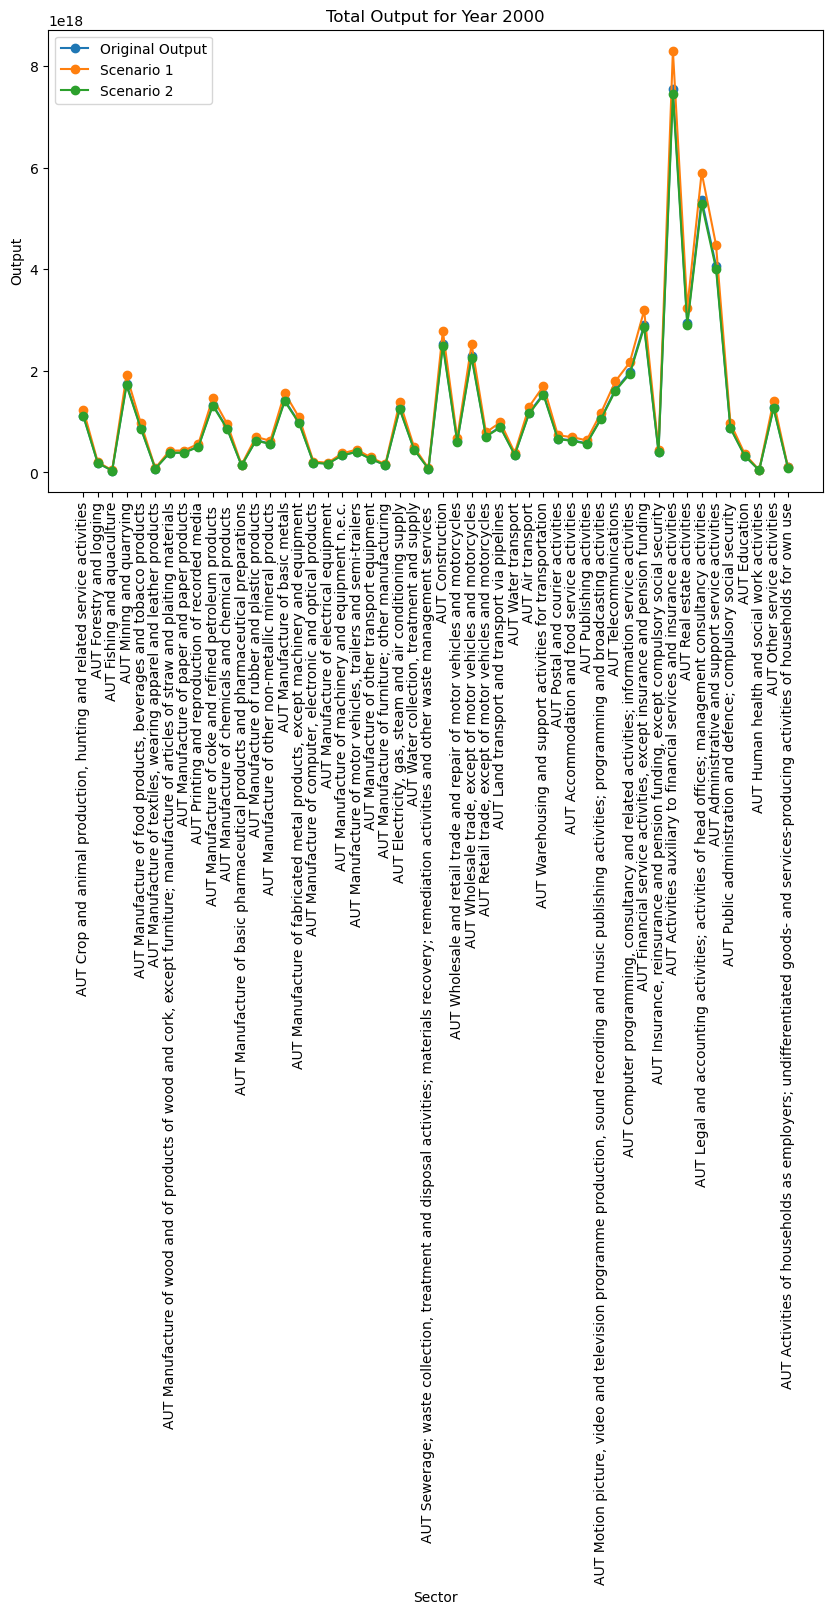

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


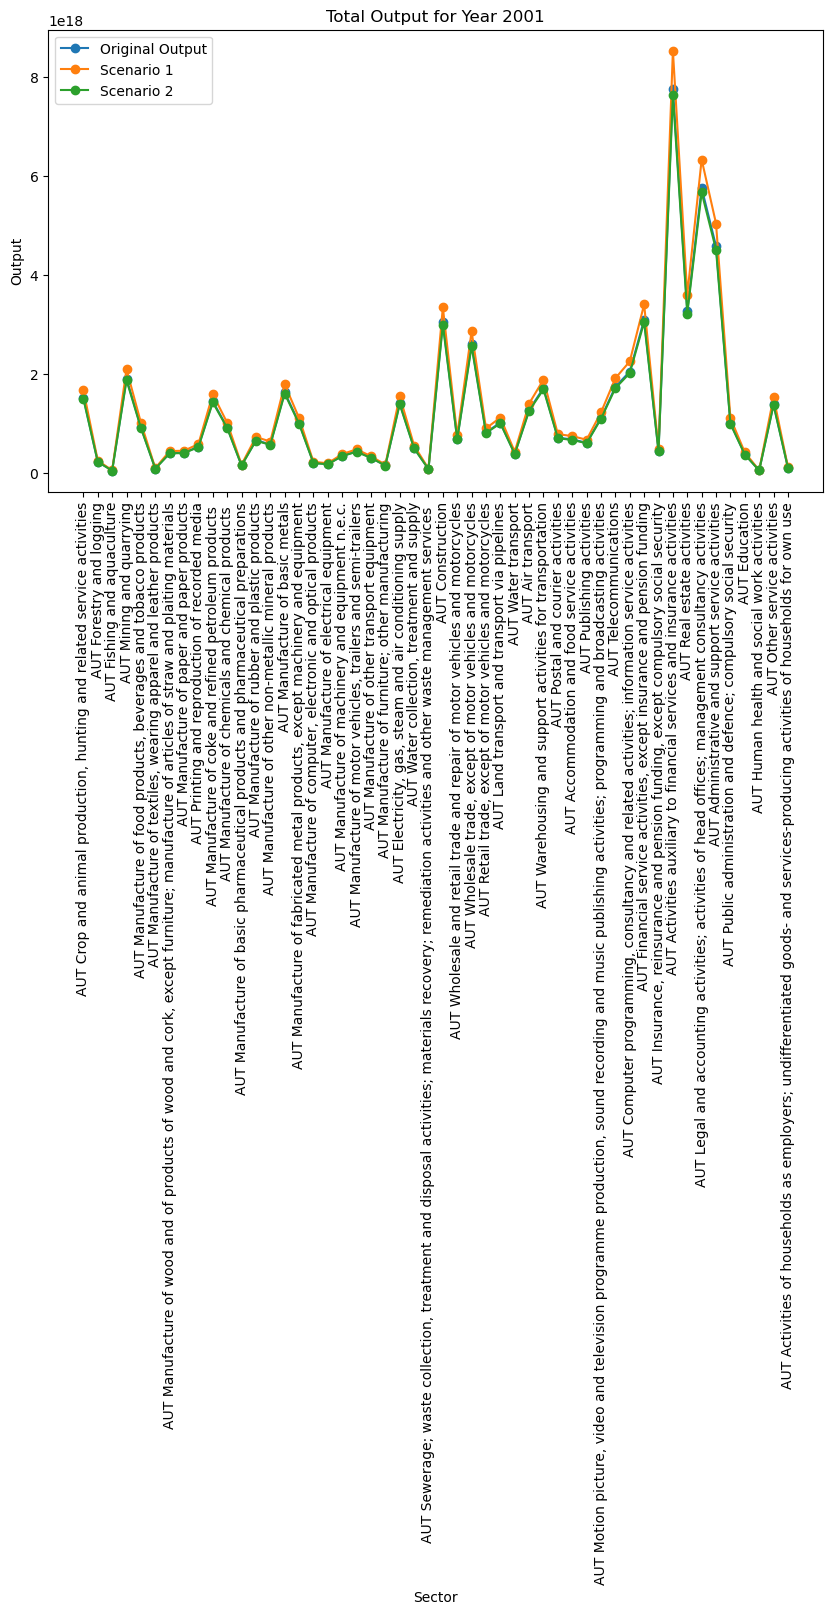

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


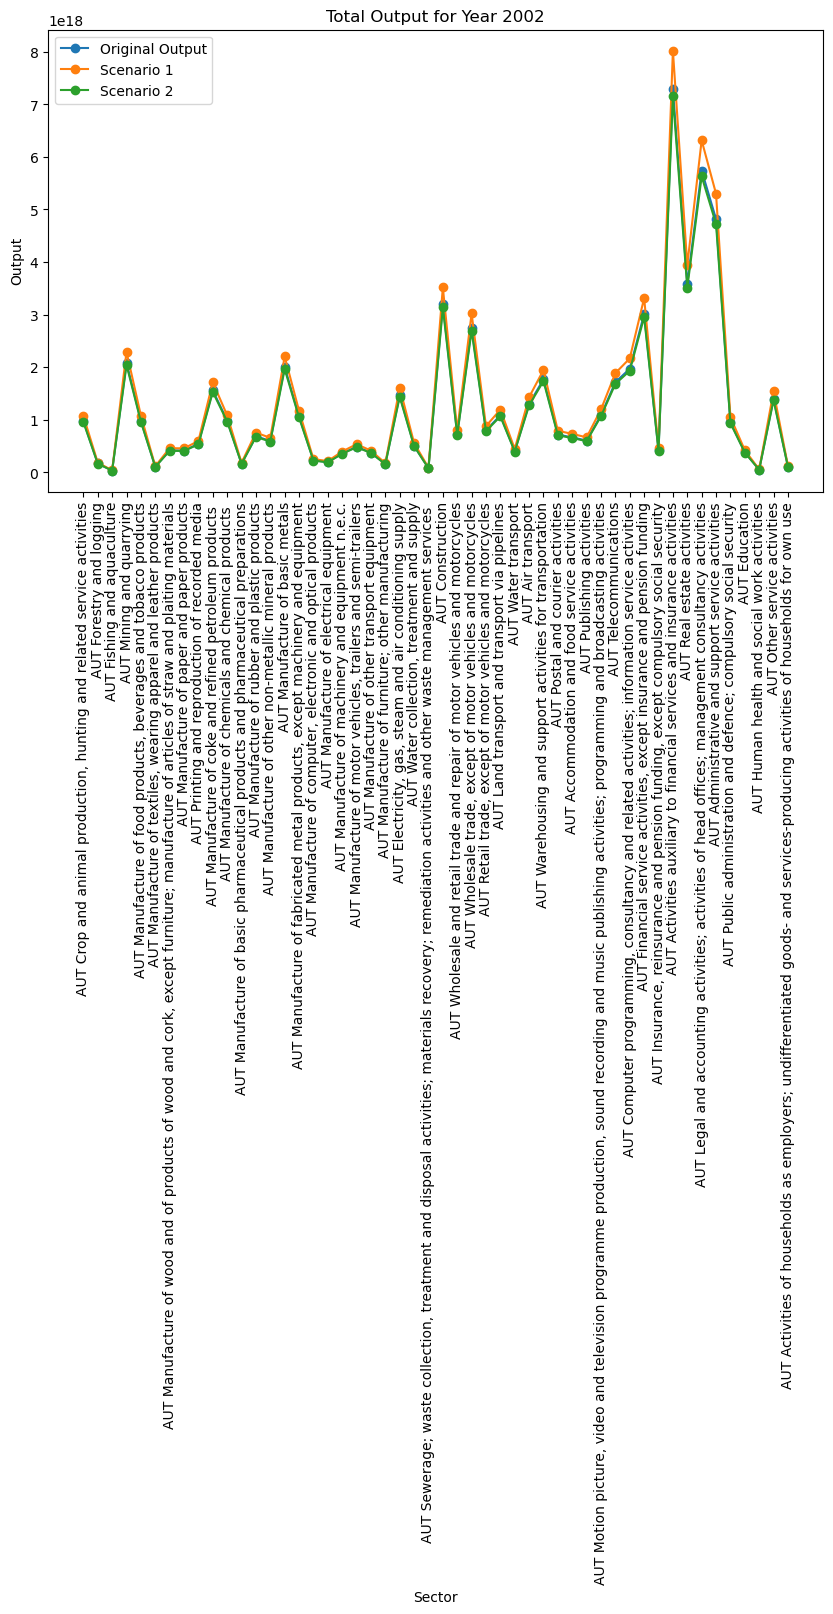

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


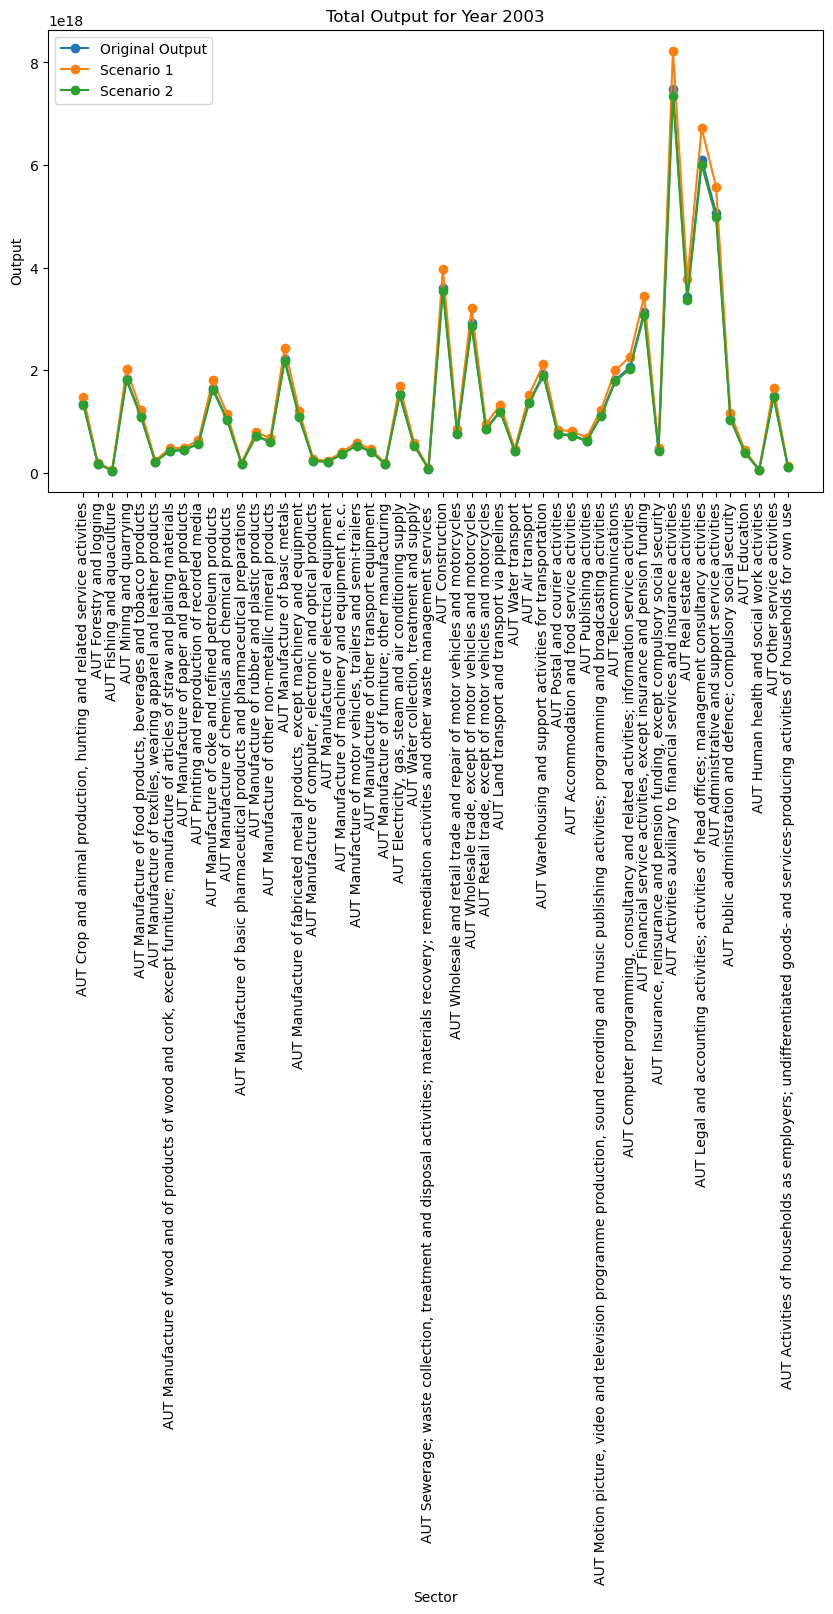

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


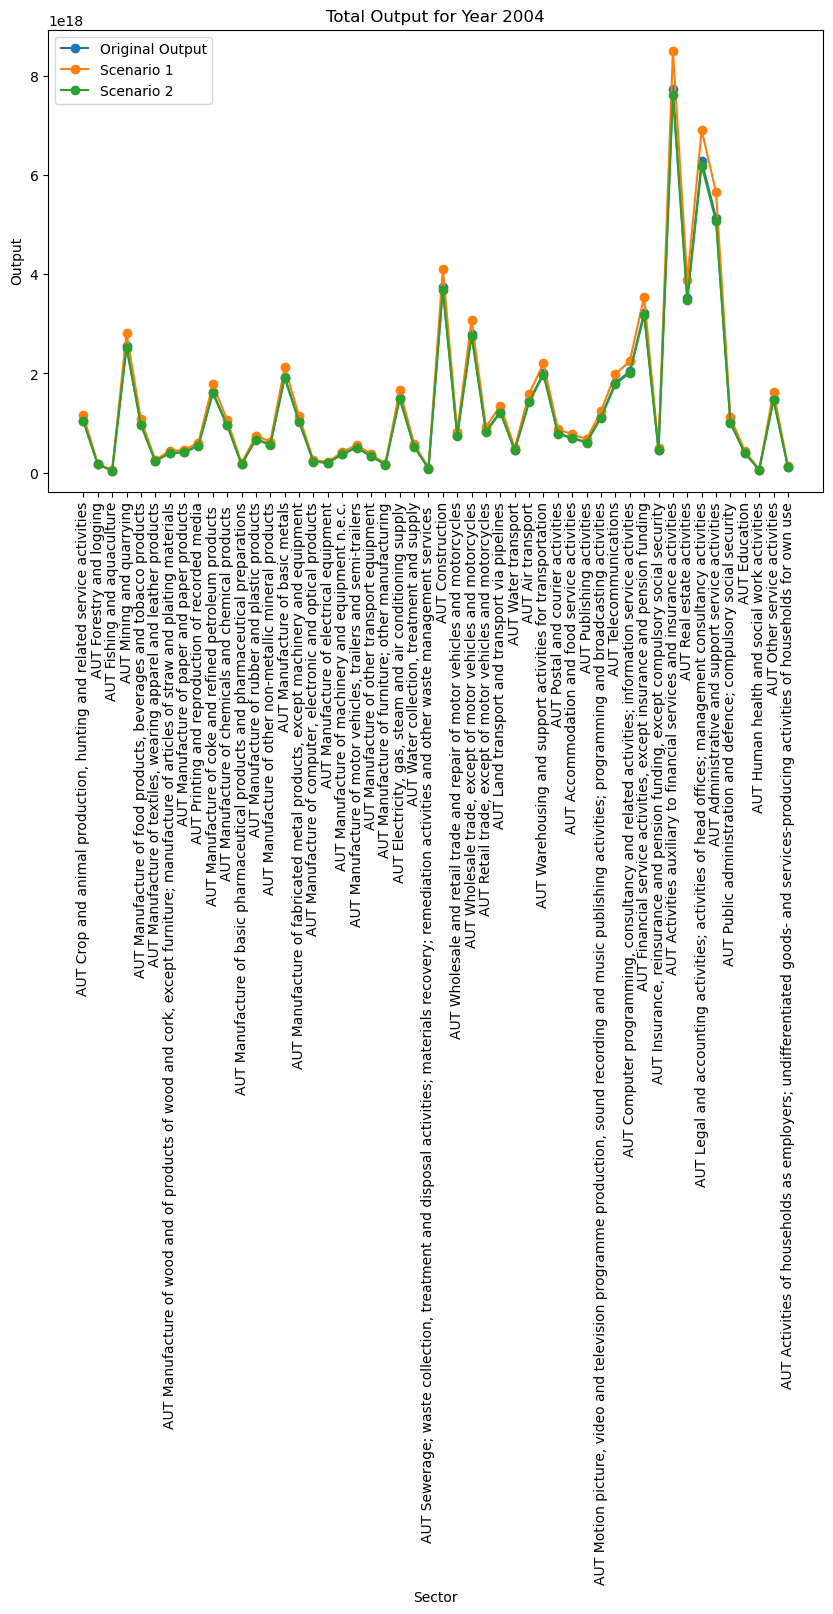

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


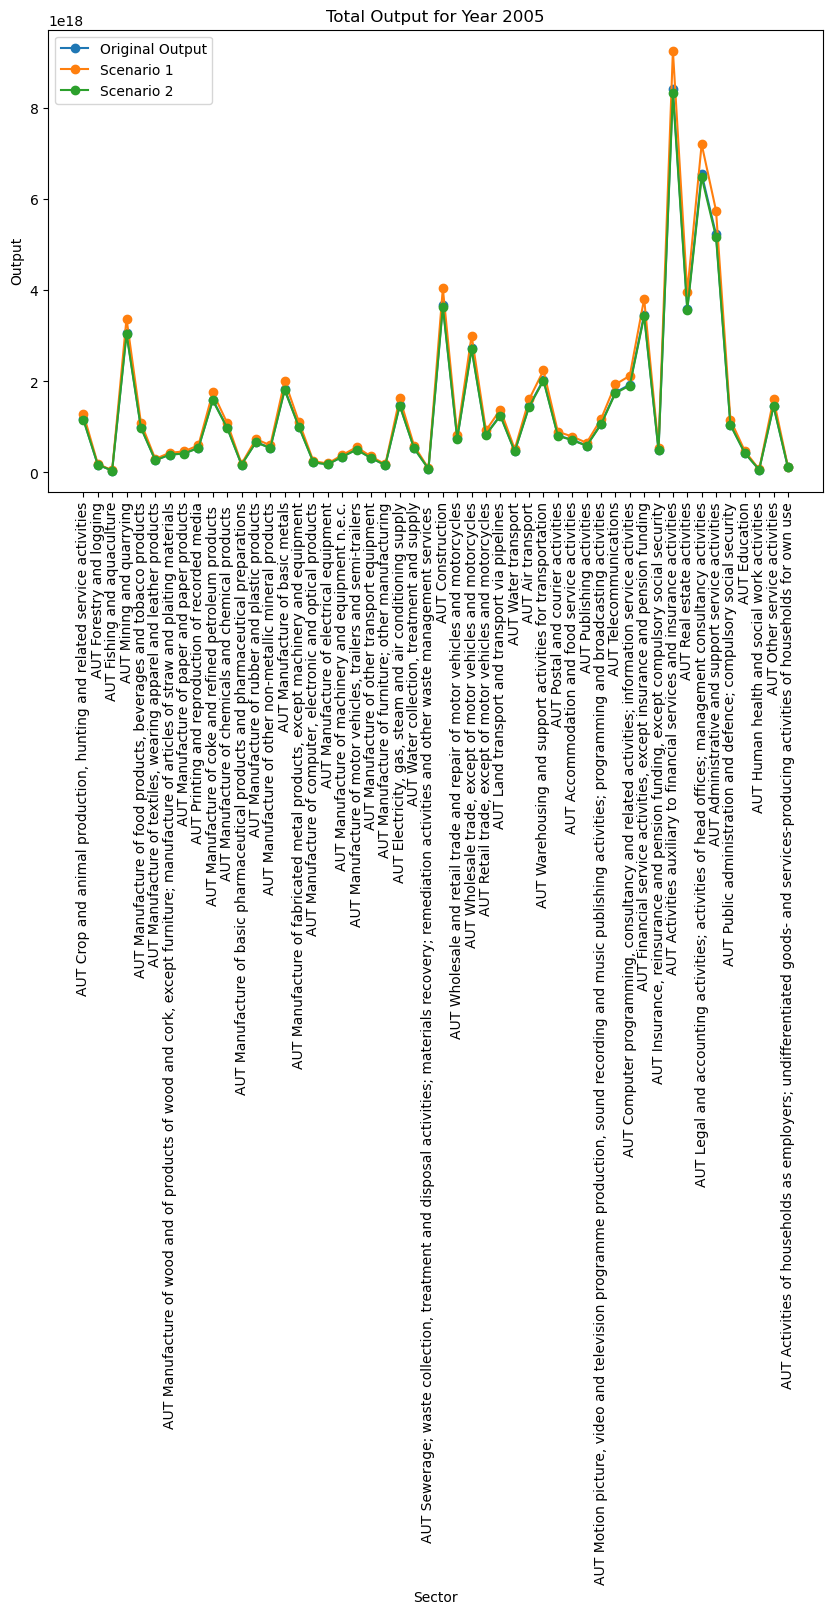

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


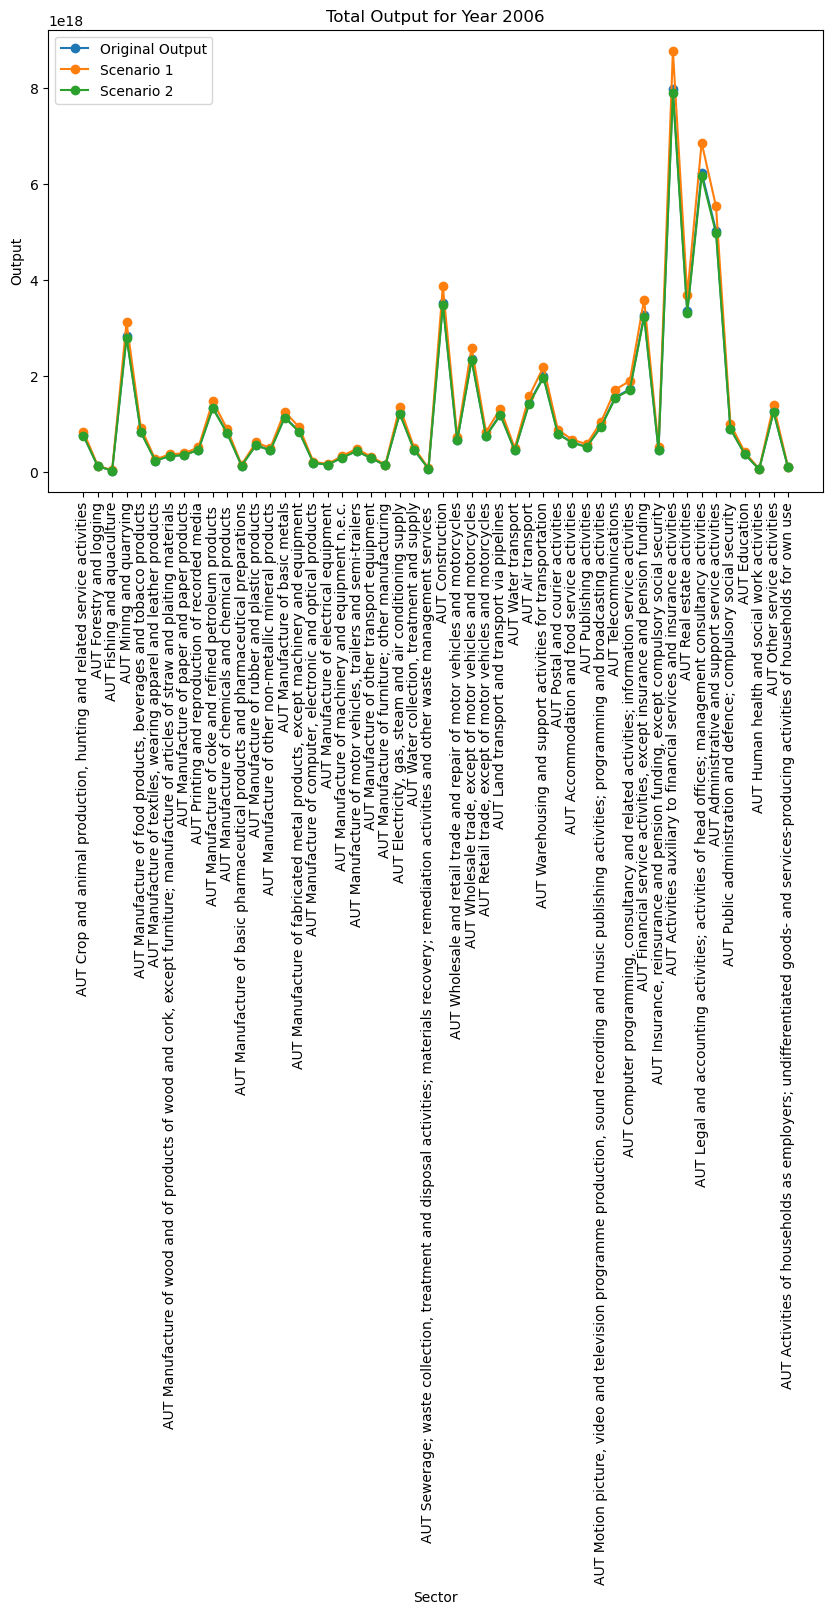

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


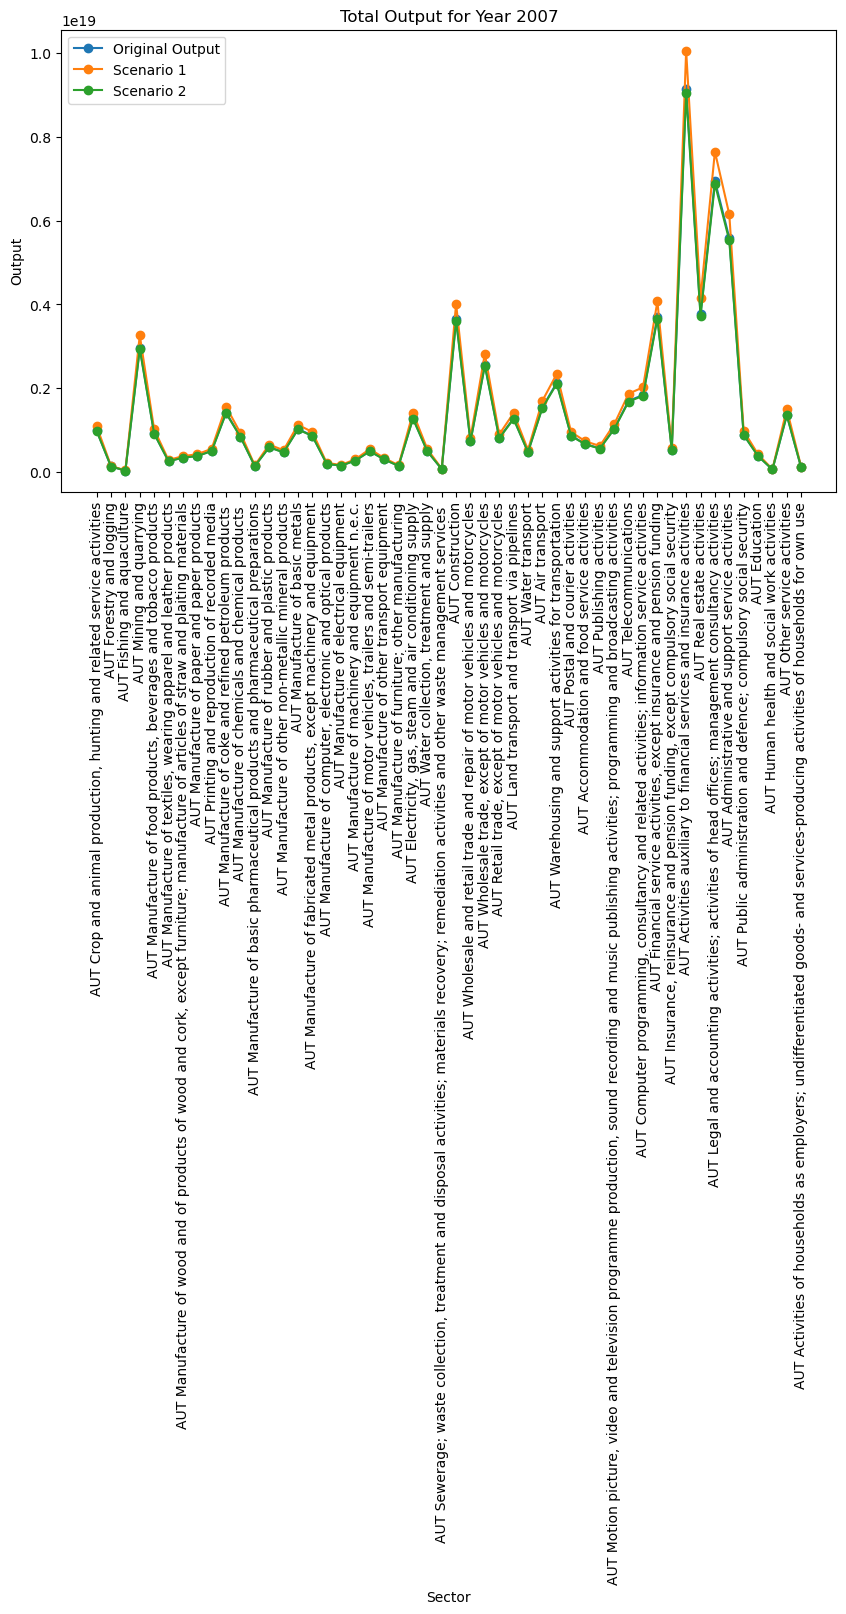

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


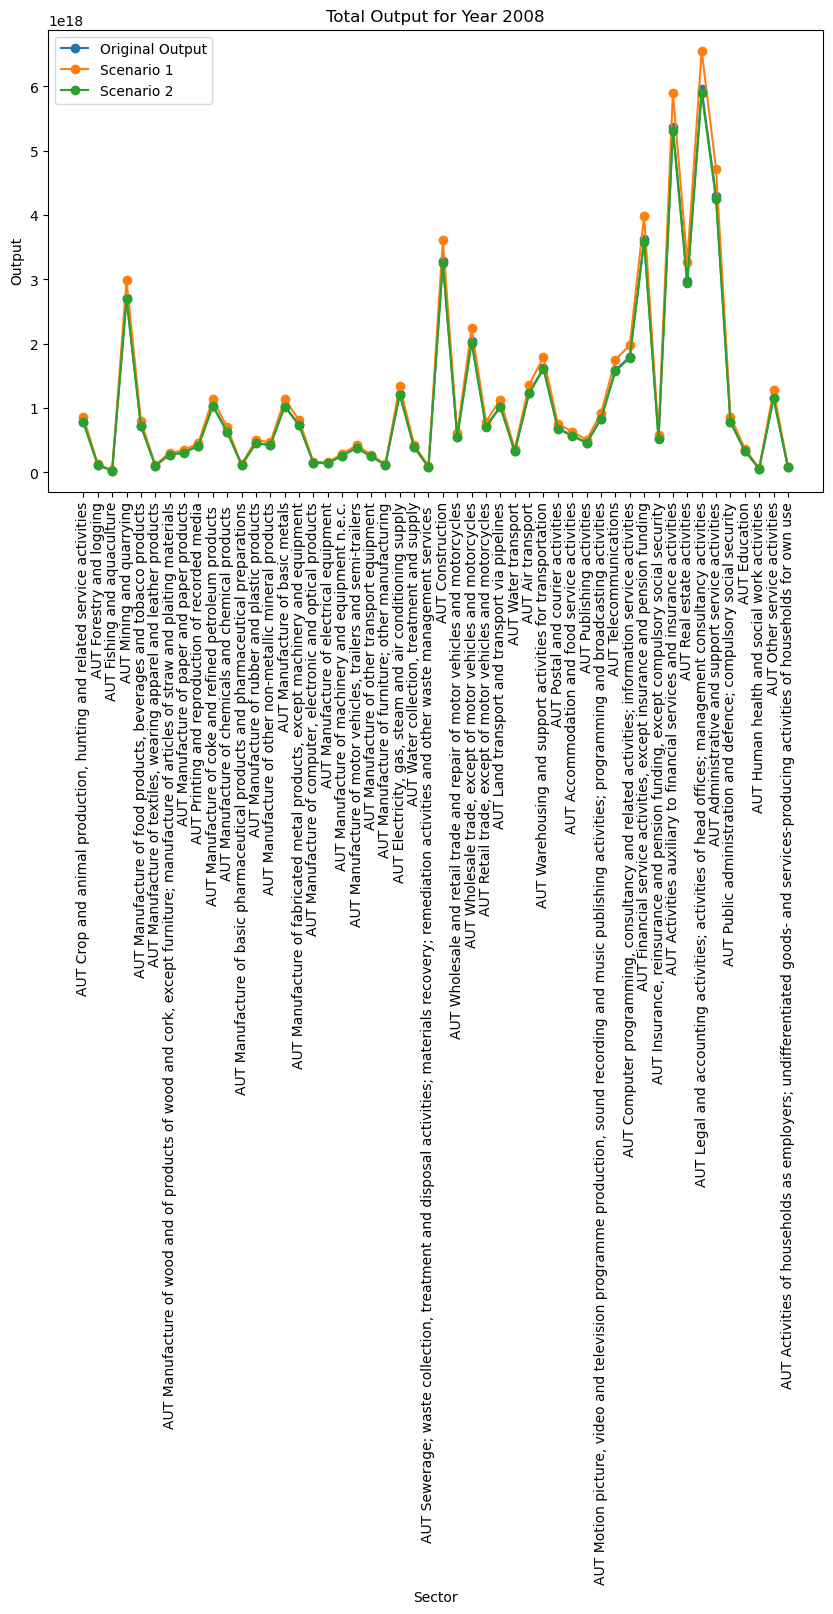

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


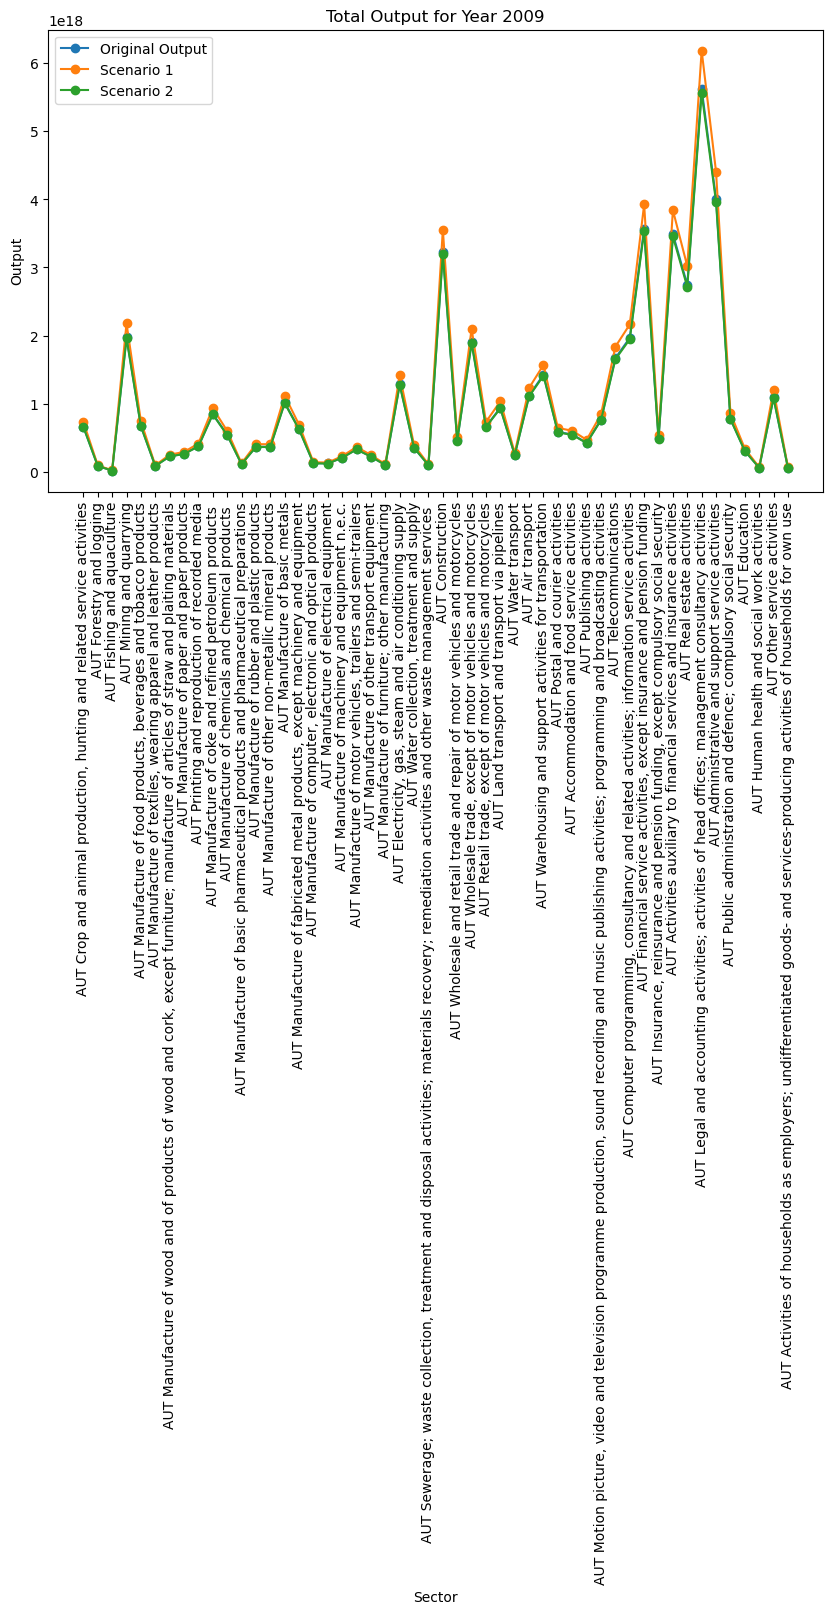

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


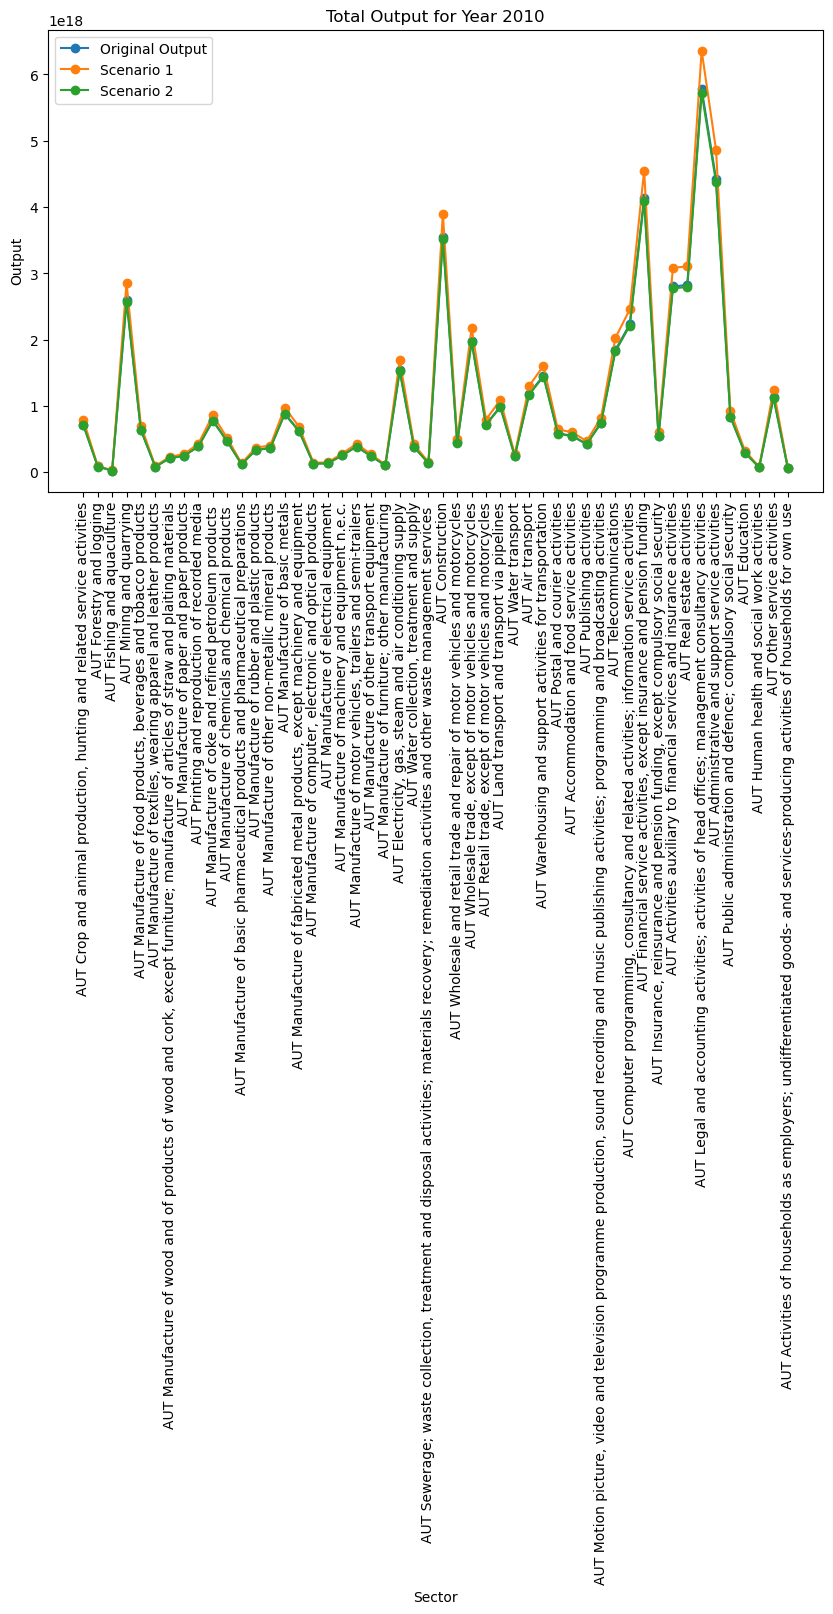

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


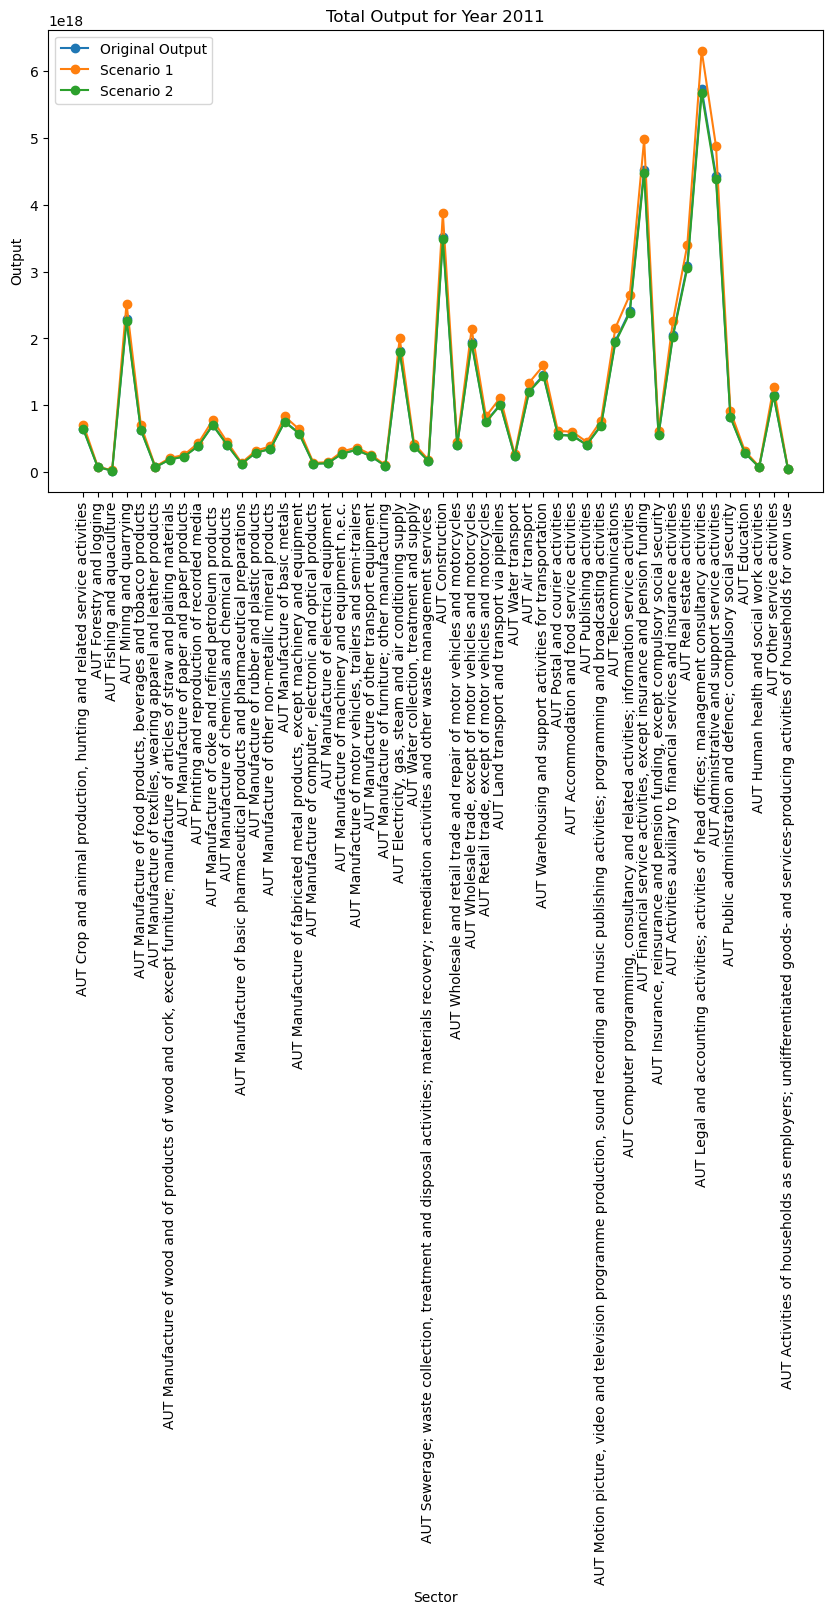

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


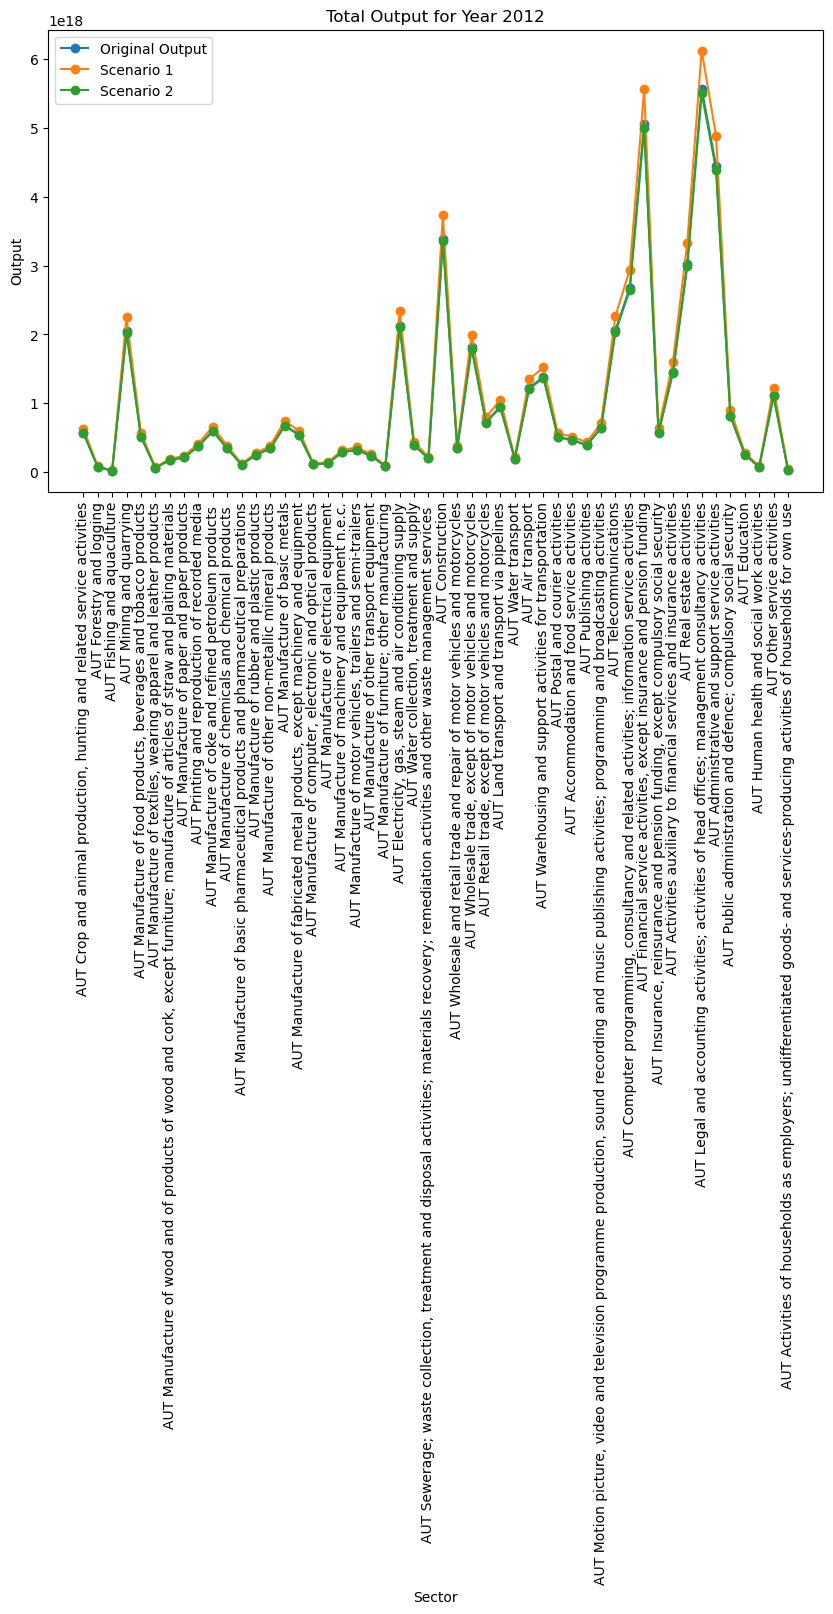

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


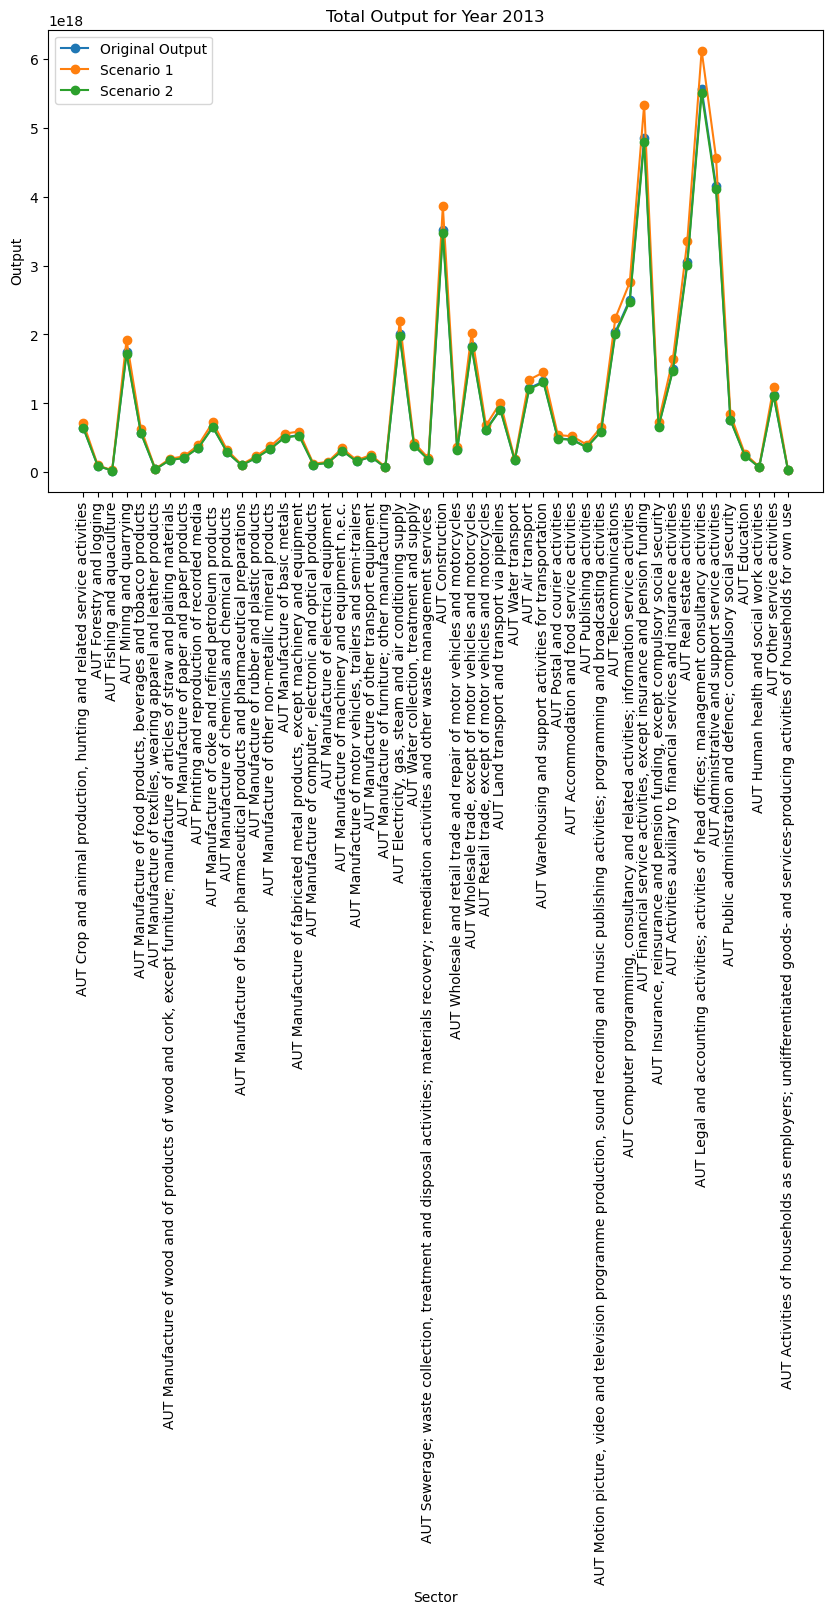

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\2687078045.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


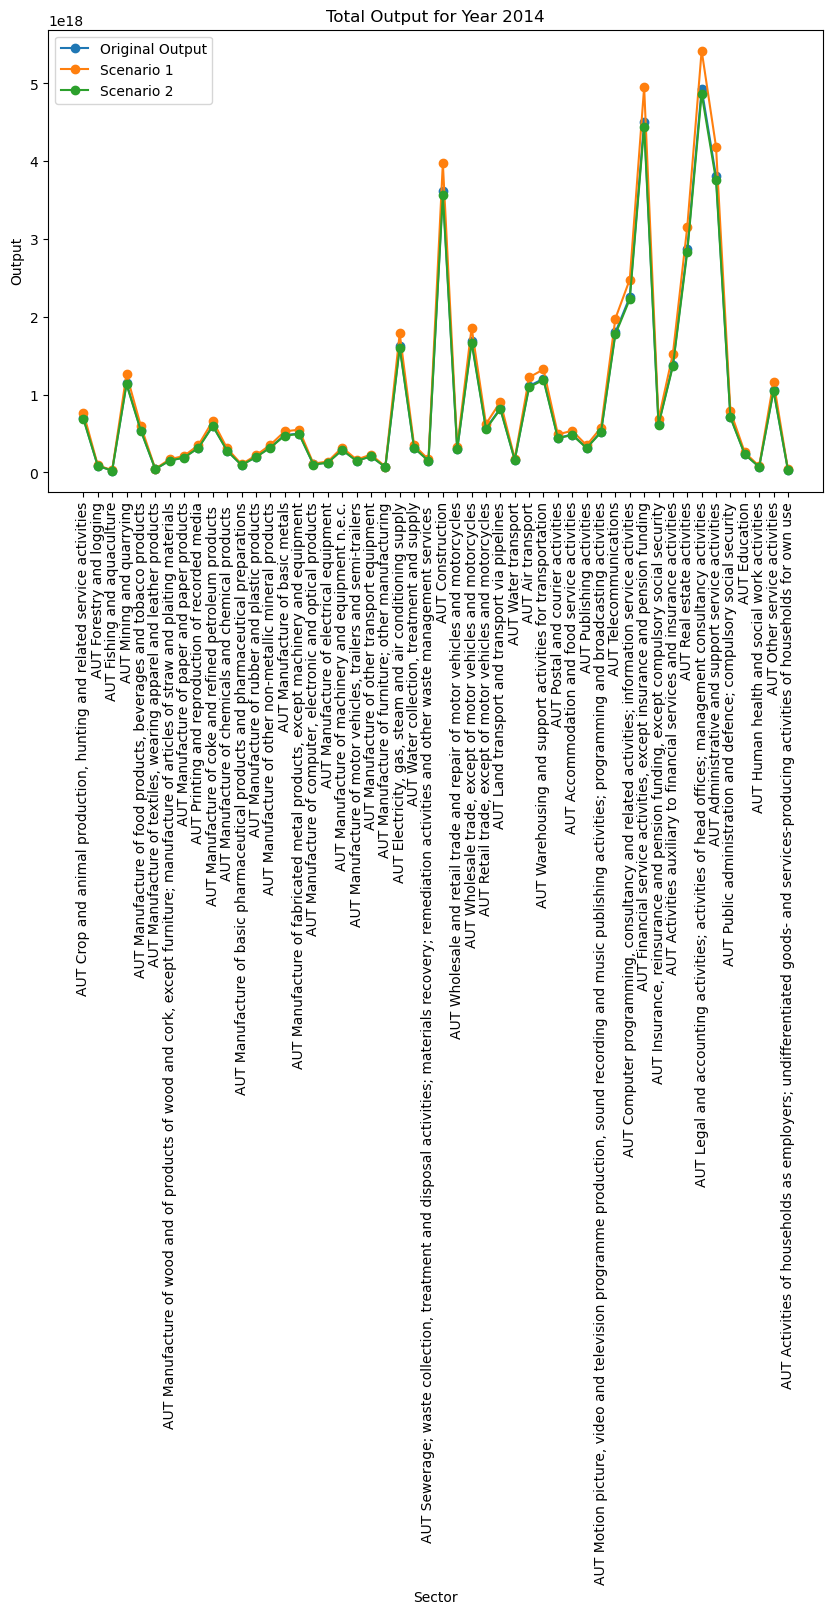

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the range of years
years = range(2000, 2015)

for year in years:
    # Paths for the files
    total_output_path = f'total_output_{year}.csv'
    output_scenario_1_path = f'output_scenario_1_{year}.csv'
    output_scenario_2_path = f'output_scenario_2_{year}.csv'

    # Load the total output for the original, scenario 1, and scenario 2
    total_output_df = pd.read_csv(total_output_path, index_col=0)
    output_scenario_1_df = pd.read_csv(output_scenario_1_path, index_col=0)
    output_scenario_2_df = pd.read_csv(output_scenario_2_path, index_col=0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(total_output_df.index, total_output_df['Total Output'], label='Original Output', marker='o')
    plt.plot(output_scenario_1_df.index, output_scenario_1_df['Total Output Scenario 1'], label='Scenario 1', marker='o')
    plt.plot(output_scenario_2_df.index, output_scenario_2_df['Total Output Scenario 2'], label='Scenario 2', marker='o')
    plt.title(f'Total Output for Year {year}')
    plt.xlabel('Sector')
    plt.ylabel('Output')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'total_output_plot_{year}.png')  # Save the plot as an image
    plt.show()
